# Flow Time

In [1]:
# Datenzugriff
from configs.config import get_path

# Utils
import src.utils.presenter as show
from src.utils.production_process import convert
from src.utils.production_process import initialize as init
from src.utils.analize import check_constrains as check

from src.utils.production_process import time_determination as term

# Solver Model
from src.models.lp import flowtime_scheduling as lp_flowtime

# Extern
import pandas as pd

In [2]:
max_time = 60*3 # 3 min

In [3]:
basic_data_path = get_path("data", "basic")

df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_jssp = init.production_orders(df_instance)
df_jssp

,Job,Production_Plan_ID,Operation,Machine,Processing Time
0,0,0,0,M00,29
1,0,0,1,M01,78
2,0,0,2,M02,9
3,0,0,3,M03,36
4,0,0,4,M04,49
...,...,...,...,...,...
95,9,9,5,M09,76
96,9,9,6,M05,47
97,9,9,7,M03,52
98,9,9,8,M04,90


In [4]:
df_job_times = term.generate_arrivals(df_jssp, u_b_mmax = 0.9, var_type="Integer", random_seed=122)
df_job_times

,Job,Production_Plan_ID,Arrival
0,0,0,11
10,1,1,96
20,2,2,118
30,3,3,160
40,4,4,197
50,5,5,263
60,6,6,324
70,7,7,341
80,8,8,356
90,9,9,441


## a) einfach

In [5]:
# Scheduling
df_schedule = lp_flowtime.solve_jssp(df_jssp, df_job_times, solver= "HiGHS", var_cat="Integer", msg=False, timeLimit=max_time, gapRel= 0.05)
df_schedule

BigM: 6000

Solver-Informationen:
  Summe Flow Times        : 6682.0
  Solver-Status           : Optimal
  Anzahl Variablen        : 560
  Anzahl Constraints      : 1000
  Laufzeit                : ~180.19 Sekunden


,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,0,0,11,M00,11.0,29.0,29.0,40.0
1,0,1,11,M01,40.0,78.0,107.0,118.0
2,1,0,96,M00,96.0,43.0,43.0,139.0
3,0,2,11,M02,118.0,9.0,116.0,127.0
4,2,0,118,M01,118.0,91.0,91.0,209.0
...,...,...,...,...,...,...,...,...
95,7,9,341,M03,1042.0,79.0,780.0,1121.0
96,9,6,441,M05,1082.0,47.0,688.0,1129.0
97,9,7,441,M03,1129.0,52.0,740.0,1181.0
98,9,8,441,M04,1181.0,90.0,830.0,1271.0


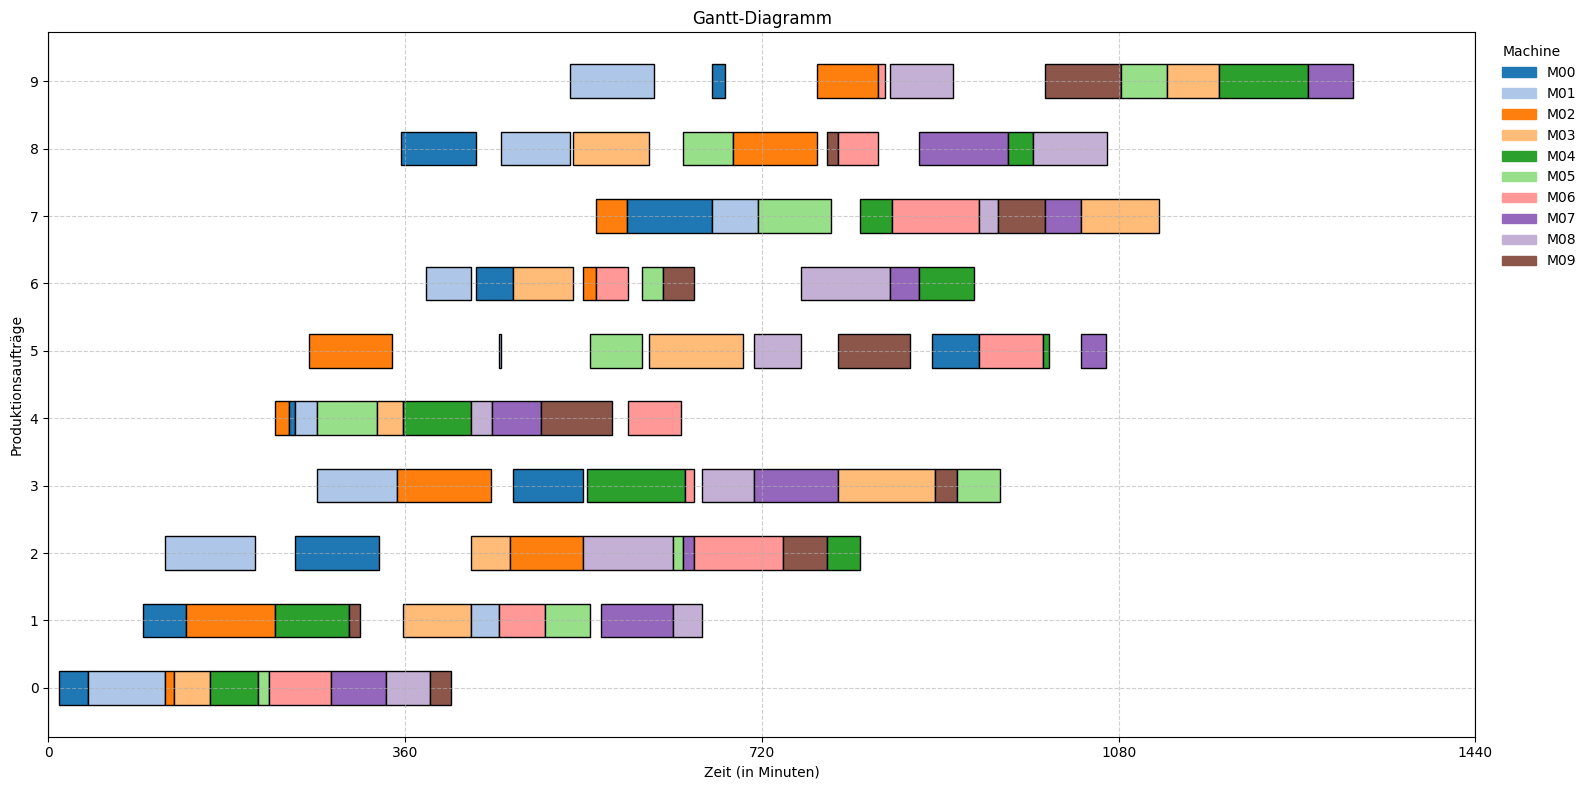

In [6]:
show.plot_gantt(df_schedule, perspective="Job")

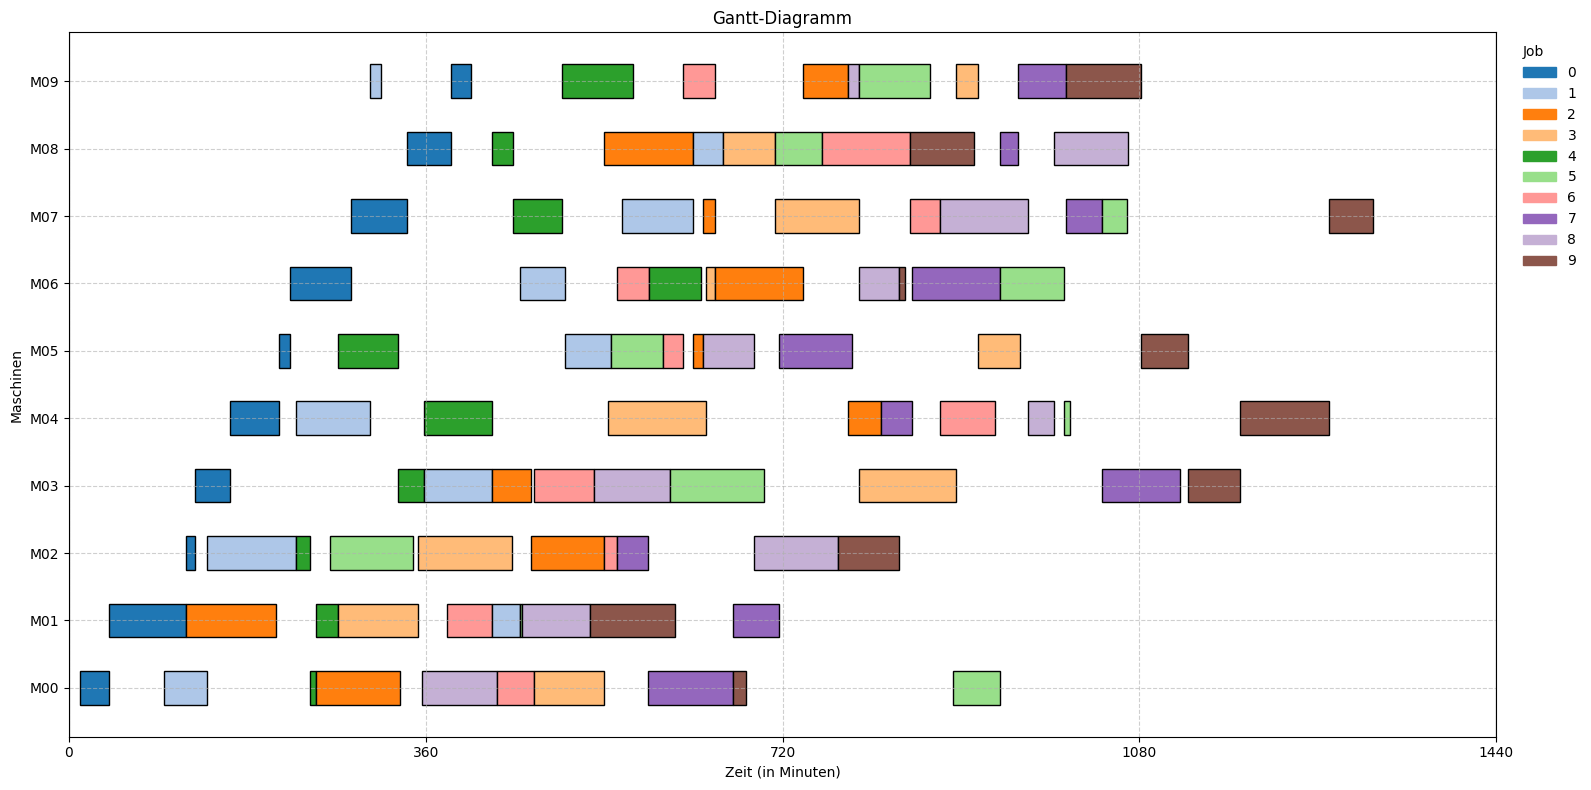

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job


True

In [7]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)
check.is_start_correct(df_schedule)

In [8]:
df_schedule.to_csv(basic_data_path / "schedule_example.csv", index=False)

## b) gewichtet

In [9]:
# Scheduling
df_schedule = lp_flowtime.solve_jssp_weighted_arrival(df_jssp, df_job_times, solver= "HiGHS", var_cat="Integer", msg=False, timeLimit=max_time, gapRel= 0.05)
df_schedule

BigM: 6000

Solver-Informationen:
  Gewichtete Flow Time     : 11333.3971
  Solver-Status            : Optimal
  Anzahl Variablen         : 560
  Anzahl Constraints       : 1000
  Laufzeit                 : ~180.22 Sekunden


,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,0,0,11,M00,11.0,29.0,29.0,40.0
1,0,1,11,M01,40.0,78.0,107.0,118.0
2,1,0,96,M00,96.0,43.0,43.0,139.0
3,0,2,11,M02,118.0,9.0,116.0,127.0
4,2,0,118,M01,118.0,91.0,91.0,209.0
...,...,...,...,...,...,...,...,...
95,9,7,441,M03,1100.0,52.0,711.0,1152.0
96,8,8,356,M04,1126.0,26.0,796.0,1152.0
97,8,9,356,M08,1152.0,74.0,870.0,1226.0
98,9,8,441,M04,1152.0,90.0,801.0,1242.0


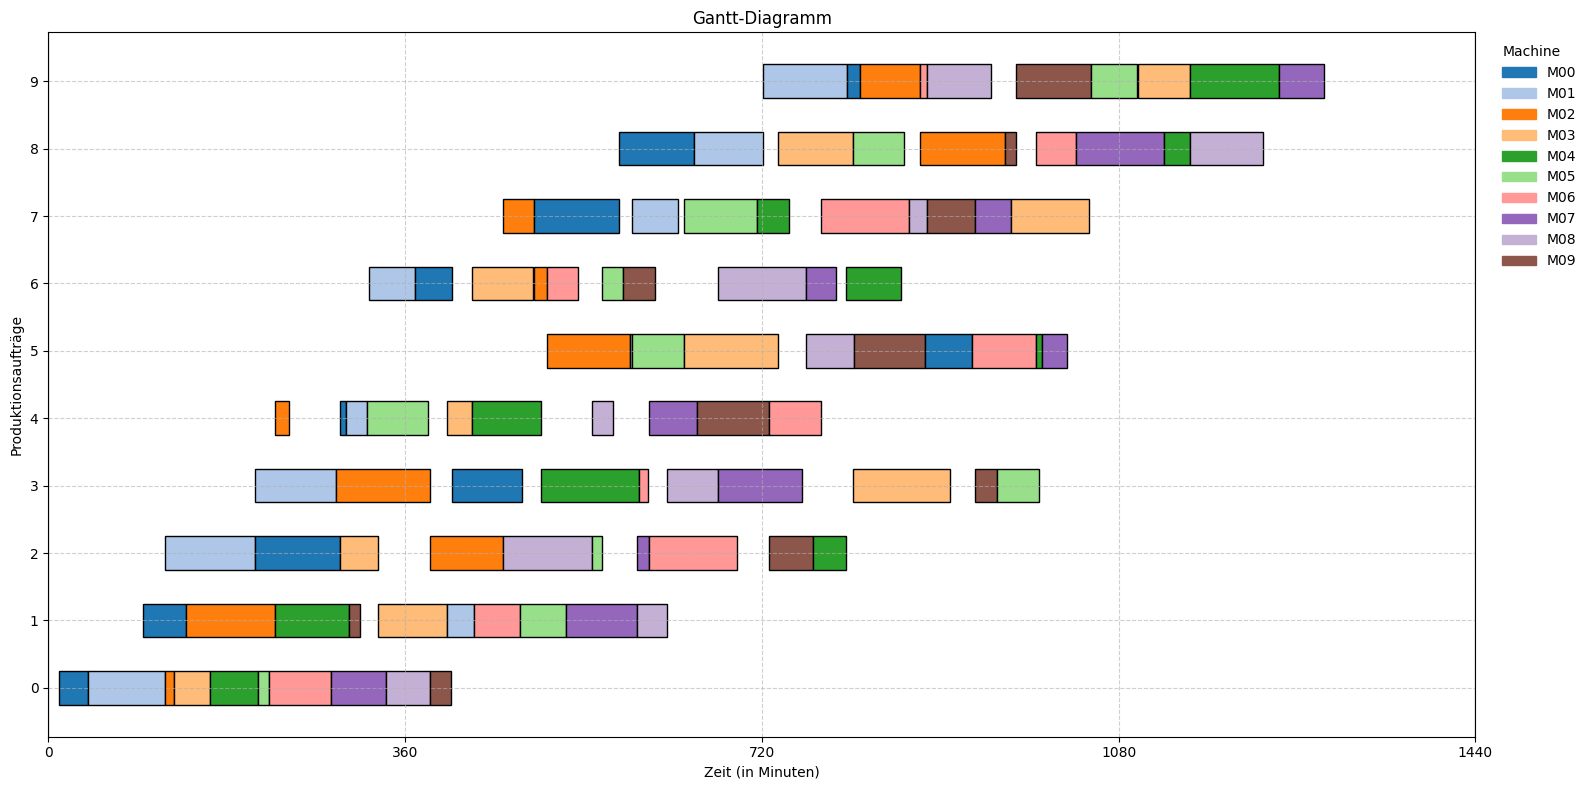

In [10]:
show.plot_gantt(df_schedule, perspective="Job")

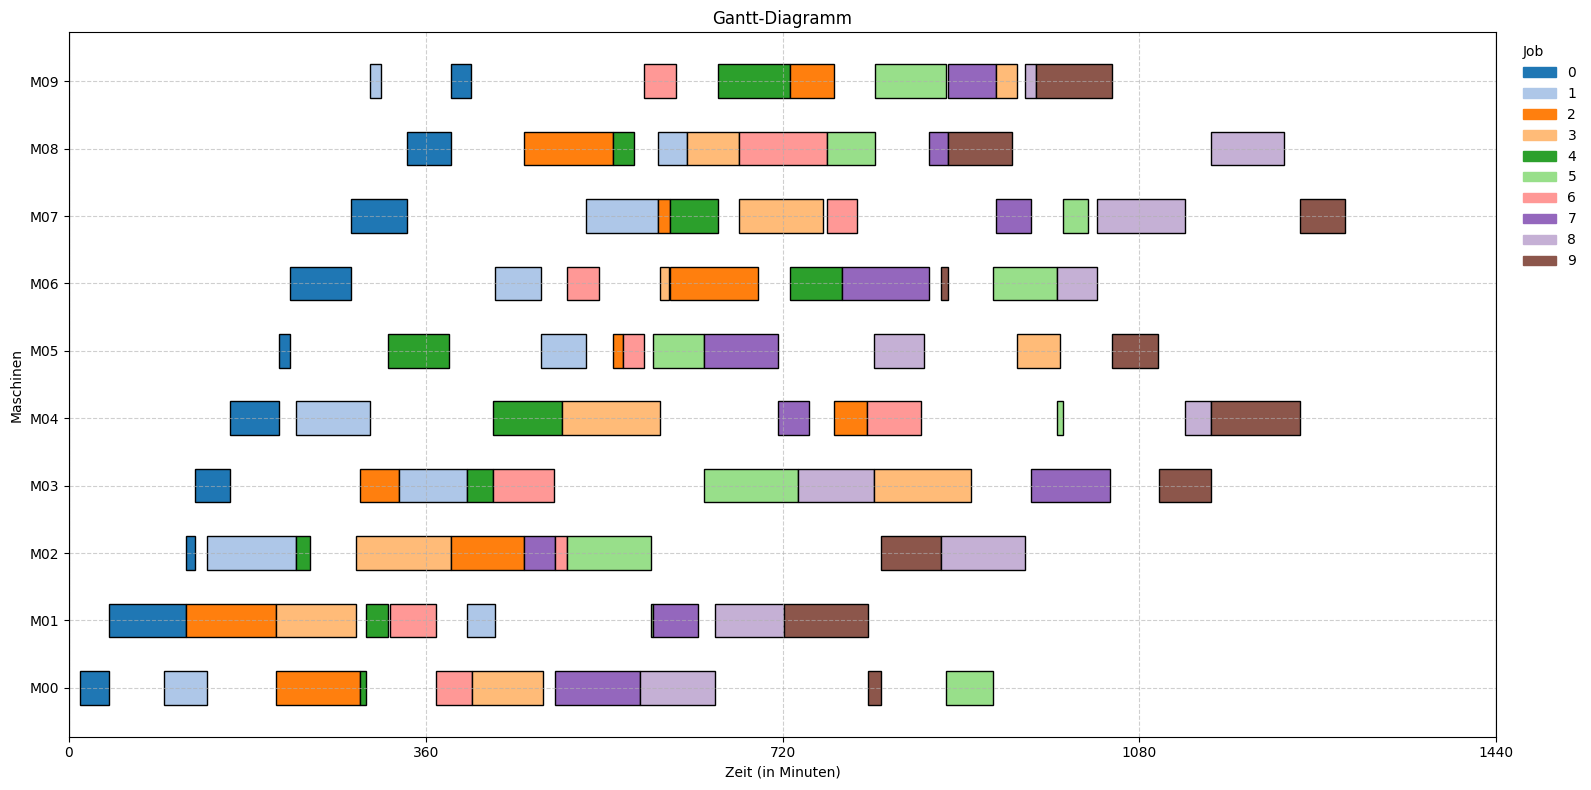

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job


True

In [11]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)
check.is_start_correct(df_schedule)